In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn import metrics
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.shape

(5000, 14)

In [6]:
# Checking if ID column is unique and setting it as the index

print(df['ID'].is_unique)
df2=df.set_index('ID')
df2.head()

True


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df2['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [8]:
df2.info()

# There are no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [9]:
df2.describe().T

# The experience column seems to have potential outlier(s) as the table below shows that there are negative values

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [10]:
df2[df2['Experience']<0]['Experience'].value_counts()

# There are 52 negative values in the 'Experience' column.
# There could be two ways to fix this:
    # Approach 1. Assume that the '-' might have been input by mistake and replace these negative values with the absolute values
    # Approach 2. Identify the predictors for experience from the given data and use them to estimate the experience values

# For the given use case, approach 1 is considerably simpler than approach 2. However, before going ahead with it, it's better to make sure that the approximation is reasonable
# For example: Someone of age 50 with an experience of -2 cannot simply be replaced with experience value of 2

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

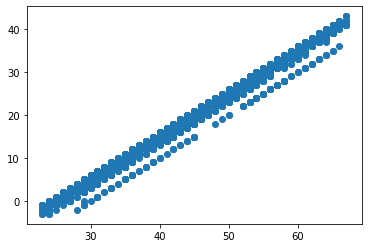

In [11]:
# Checking the relationship between age and experience.

plt.scatter(df2['Age'],df2['Experience'])

# We see a strong correlation between age and experience. 

In [12]:
# Comparing age vs experience and checking if replacing the negative experience value with the absolute value would be appropriate

df2[df2['Experience']<0][['Age','Experience']]

# The dataframe below shows that the ages where experience values have gone wrong are between 23 and 29 and their corresponding ages are 1 and 3
# Replacing the experience values with the absolute values would be a reasonable approximation

,Age,Experience
ID,,
90,25,-1
227,24,-1
316,24,-2
452,28,-2
525,24,-1
537,25,-1
541,25,-1
577,25,-1
584,24,-1


In [13]:
# Replacing the 'negative' experience values with the absolute value

df2['Experience'] = df2['Experience'].apply(lambda x : abs(x) if(x<0) else x)

In [14]:
df2['Experience'].describe()

# There are no more negative values in the experience column

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [15]:
# In the next few steps, some basic EDA is performed. 

# To start with, we'll look at the distribution of data in each of the columns

df2.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

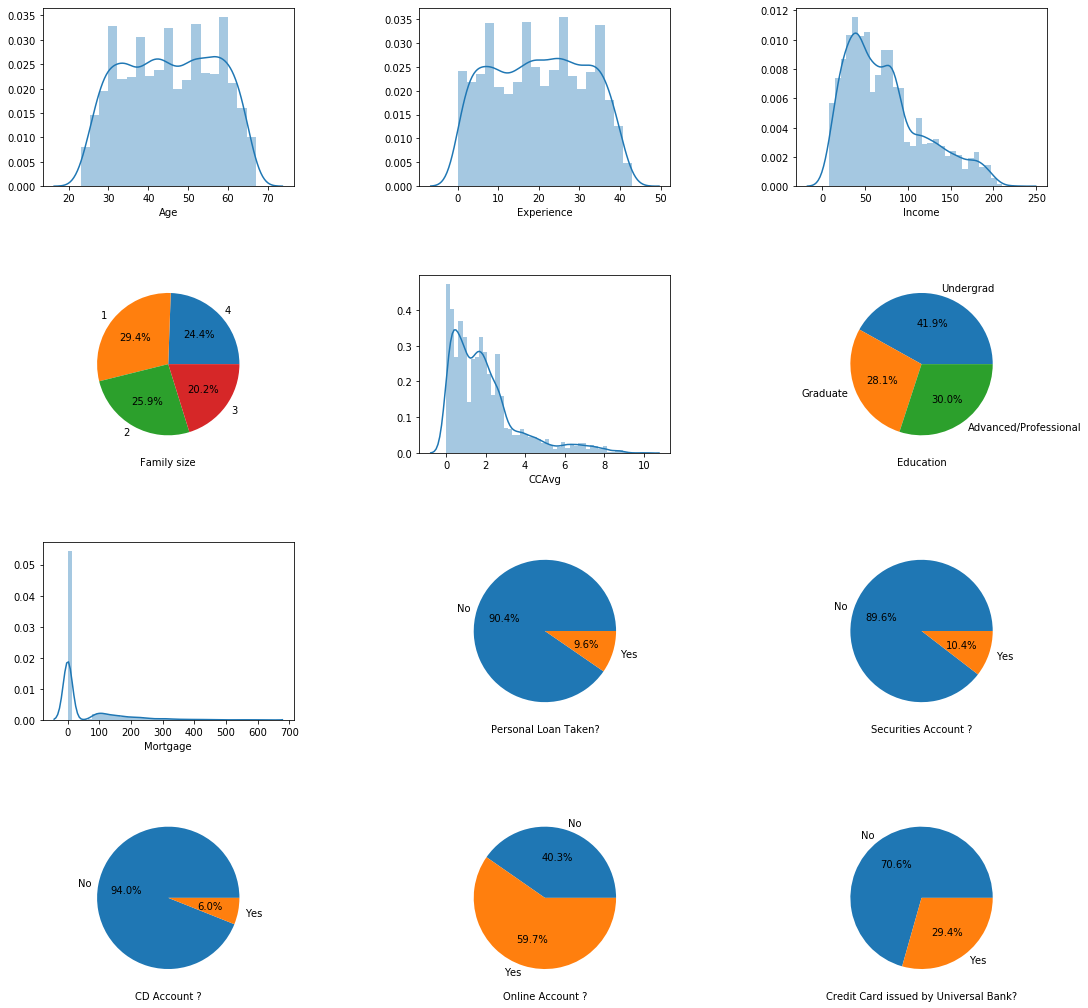

In [16]:
# Analysing the data distribution in each column

fig,ax=plt.subplots(4,3,figsize=(18,18))
fig.subplots_adjust(wspace=0.5,hspace=0.5)

ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12=ax.flatten()
sns.distplot(df2['Age'],ax=ax1)
sns.distplot(df2['Experience'],ax=ax2)
sns.distplot(df2['Income'],ax=ax3)
(df['Family'].value_counts(normalize=True,sort=False)*100).plot(kind='pie',ax=ax4,autopct='%1.1f%%')
ax4.set_xlabel('Family size')
ax4.set_ylabel('')
sns.distplot(df2['CCAvg'],ax=ax5)
labels1 = ['Undergrad', 'Graduate','Advanced/Professional']
(df2['Education'].value_counts(normalize=True,sort=False)*100).plot(kind='pie',ax=ax6,labels=labels1,autopct='%1.1f%%')
ax6.set_xlabel('Education')
ax6.set_ylabel('')
sns.distplot(df2['Mortgage'],ax=ax7)
labels = ['No','Yes']
(df2['Personal Loan'].value_counts(normalize=True,sort=False)*100).plot(kind='pie',ax=ax8,labels=labels,autopct='%1.1f%%')
ax8.set_xlabel('Personal Loan Taken?')
ax8.set_ylabel('')
(df2['Securities Account'].value_counts(normalize=True,sort=False)*100).plot(kind='pie',ax=ax9,labels=labels,autopct='%1.1f%%')
ax9.set_xlabel('Securities Account ?')
ax9.set_ylabel('')
(df2['CD Account'].value_counts(normalize=True,sort=False)*100).plot(kind='pie',ax=ax10,labels=labels,autopct='%1.1f%%')
ax10.set_xlabel('CD Account ?')
ax10.set_ylabel('')
(df2['Online'].value_counts(normalize=True,sort=False)*100).plot(kind='pie',ax=ax11,labels=labels,autopct='%1.1f%%')
ax11.set_xlabel('Online Account ?')
ax11.set_ylabel('')
(df2['CreditCard'].value_counts(normalize=True,sort=False)*100).plot(kind='pie',ax=ax12,labels=labels,autopct='%1.1f%%')
ax12.set_xlabel('Credit Card issued by Universal Bank?')
ax12.set_ylabel('')
plt.show()

# **EDA - Distribution along each attribute**
***
## *1.Age:* 
### The age range of the people holding a bank account is wide, ranging for early 20s to late 60s. The major chunk of the customers are between 30 and 60 years of age. It is likely that customers <50 years of age take personal loan, given that major life events/decisions happen before this.
## *2.Experience:* 
### As expected from the wide age range, experience is also wide ranging from 0 to 40 years of experience, with the major chunk of customers having between 5 and 35 years of experience. 
## *3.Income:* 
### The income distribution is slightly right skewed. A majority of the customers earn around \\$45000 to \\$50000 a year. A small proportion of customers earn between \\$150000 and \\$200000. It would be interesting to see if low earning customers take loans to fulfill needs or if high earning customers are more likely to get loans approved given the high income.
## *4.Mortgage:* 
### A vast majority of the customers do not have a house mortgage.
## *5.Family size:* 
### Family sizes are almost evenly distributed. It would be interesting to see if large families are more likely to take a personal loan, given their need to cater to a larger family.
## *6.Credit card average:* 
### The CC average distribution is right skewed, with the majority between \\$500 to \\$2000 per month. There could be a possible correlation between CCAvg and Income.
## *7.Education:* 
### The customers' education levels are almost evenly distributed. Further analysis is required to see which group is more likely to take a personal loan.
## *8.Personal loan:* 
### As mentioned in the question, ~9% of the customers took a personal loan after the previous campaign.
## *9. Securities account:* 
### Only 10% of the customers have a securities account. We would have to look into how possessing a securities account influences likelihood of taking a personal loan.
## *10. Certificate of deposit:* 
### Only 6% of the customers have a certificate of deposit. We would have to look into how possessing a CD influences likelihood of taking a personal loan.
## *11. Online account:* 
### 40% of the customers have an online account. It could be possible that they are more likely to take a personal loan if good advertising is done in the online medium.
## *12. Credit card issued by universal bank:* 
### 30% of the customers have a credit card. We would have to look into how possessing a Credit card issued by universal bank influences likelihood of taking a personal loan.

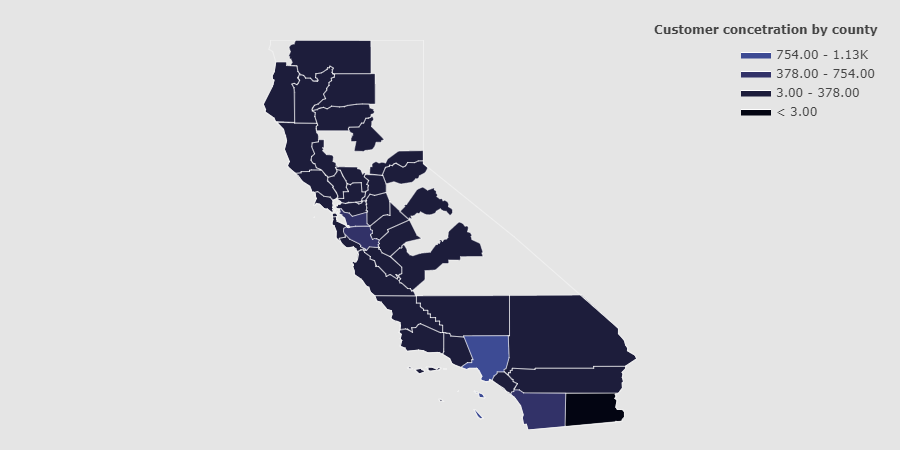

In [42]:
# Distribution by Zipcode

# A little bit of secondary research shows that the zipcodes in the given data are that of the state of California in the US. 
# Shown below is a heatmap of the number of customers from each of California's counties. 
# It's seen that Thera Bank has the majority of its customers from Los Angeles, San Diego, Santa Clare and Alameda (These state names were identified using a Google map reference since I couldn't make the hover function to display the county name to work)

import plotly.figure_factory as ff

df_map=df2[['ZIP Code']]
df_fips=pd.read_csv('FIPS.csv')
df_merge_col = pd.merge(df_map, df_fips, on='ZIP Code')
df_merge_col['FIP'] = '0' + df_merge_col['FIP'].astype(str)
df_maps=df_merge_col['FIP'].value_counts().rename_axis('FIP').to_frame('counts')
df_maps.reset_index(inplace=True)
values = df_maps['counts'].tolist()
fips = df_maps['FIP'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Customer concetration by county',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
Image(pio.to_image(fig, format='png'))

In [18]:
# Next, looking at the distribution of features cut by personal loan takers and non-takers will help identify important features

# Analysis of the distribution of continuous features cut by Personal loan takers and non-takers

df2.groupby('Personal Loan')[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']].describe(percentiles=[.5]).T

# A quick analysis of the numbers indicates that Income, CCAvg, and Mortgage value strong predictors help identify potential Personal Loan takers. This is indicated by the differences in their means

Personal Loan               0           1
Age        count  4520.000000  480.000000
           mean     45.367257   45.066667
           std      11.450427   11.590964
           min      23.000000   26.000000
           50%      45.000000   45.000000
           max      67.000000   65.000000
Experience count  4520.000000  480.000000
           mean     20.165487   19.843750
           std      11.398146   11.582443
           min       0.000000    0.000000
           50%      20.000000   20.000000
           max      43.000000   41.000000
Income     count  4520.000000  480.000000
           mean     66.237389  144.745833
           std      40.578534   31.584429
           min       8.000000   60.000000
           50%      59.000000  142.500000
           max     224.000000  203.000000
Family     count  4520.000000  480.000000
           mean      2.373451    2.612500
           std       1.148771    1.115393
           min       1.000000    1.000000
           50%       2.000000    3.000000
           max       4.000000    4.000000
CCAvg      count  4520.000000  480.000000
           mean      1.729009    3.905354
           std       1.567647    2.097681
           min       0.000000    0.000000
           50%       1.400000    3.800000
           max       8.800000   10.000000
Mortgage   count  4520.000000  480.000000
           mean     51.789381  100.845833
           std      92.038931  160.847862
           min       0.000000    0.000000
           50%       0.000000    0.000000
           max     635.000000  617.000000

In [19]:
# Analysis of the distribution of categorical features cut by Personal loan takers and non-takers

df2.groupby('Personal Loan')[['Securities Account','CD Account', 'Online', 'CreditCard']].sum().apply(lambda x: 100 * x / float(x.sum())).T

# All the features except CD Account are important predictors as they have a clear majority for non-takers of personal loan. i.e A customer with a securities account or an online account or a credit card is highly unlikely to take a personal loan.
# A customer with a CD account is almost equally likely to take or not take a personal loan thus making it a weak predictor

Personal Loan,0,1
Securities Account,88.505747,11.494253
CD Account,53.642384,46.357616
Online,90.247989,9.752011
CreditCard,90.272109,9.727891


In [406]:
# Educational level cut by Personal loan takers and non-takers

pd.crosstab(df2['Personal Loan'],df2['Education']).apply(lambda r: r/r.sum(), axis=0).T

# It is observed that customers with educational level 2 (Graduate) or level 3 (Advance/Professional) are more likely to take personal loans compared to customers with education level 1 (Undergrad)
# Therefore, Education level could be an important predictor

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


In [20]:
# Family size cut by Personal loan takers and non-takers

pd.crosstab(df2['Personal Loan'],df2['Family']).apply(lambda r: r/r.sum(), axis=0).T

# Customers with family size >2 are slightly more likely to take a personal loan compared to customers with family size <=2

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


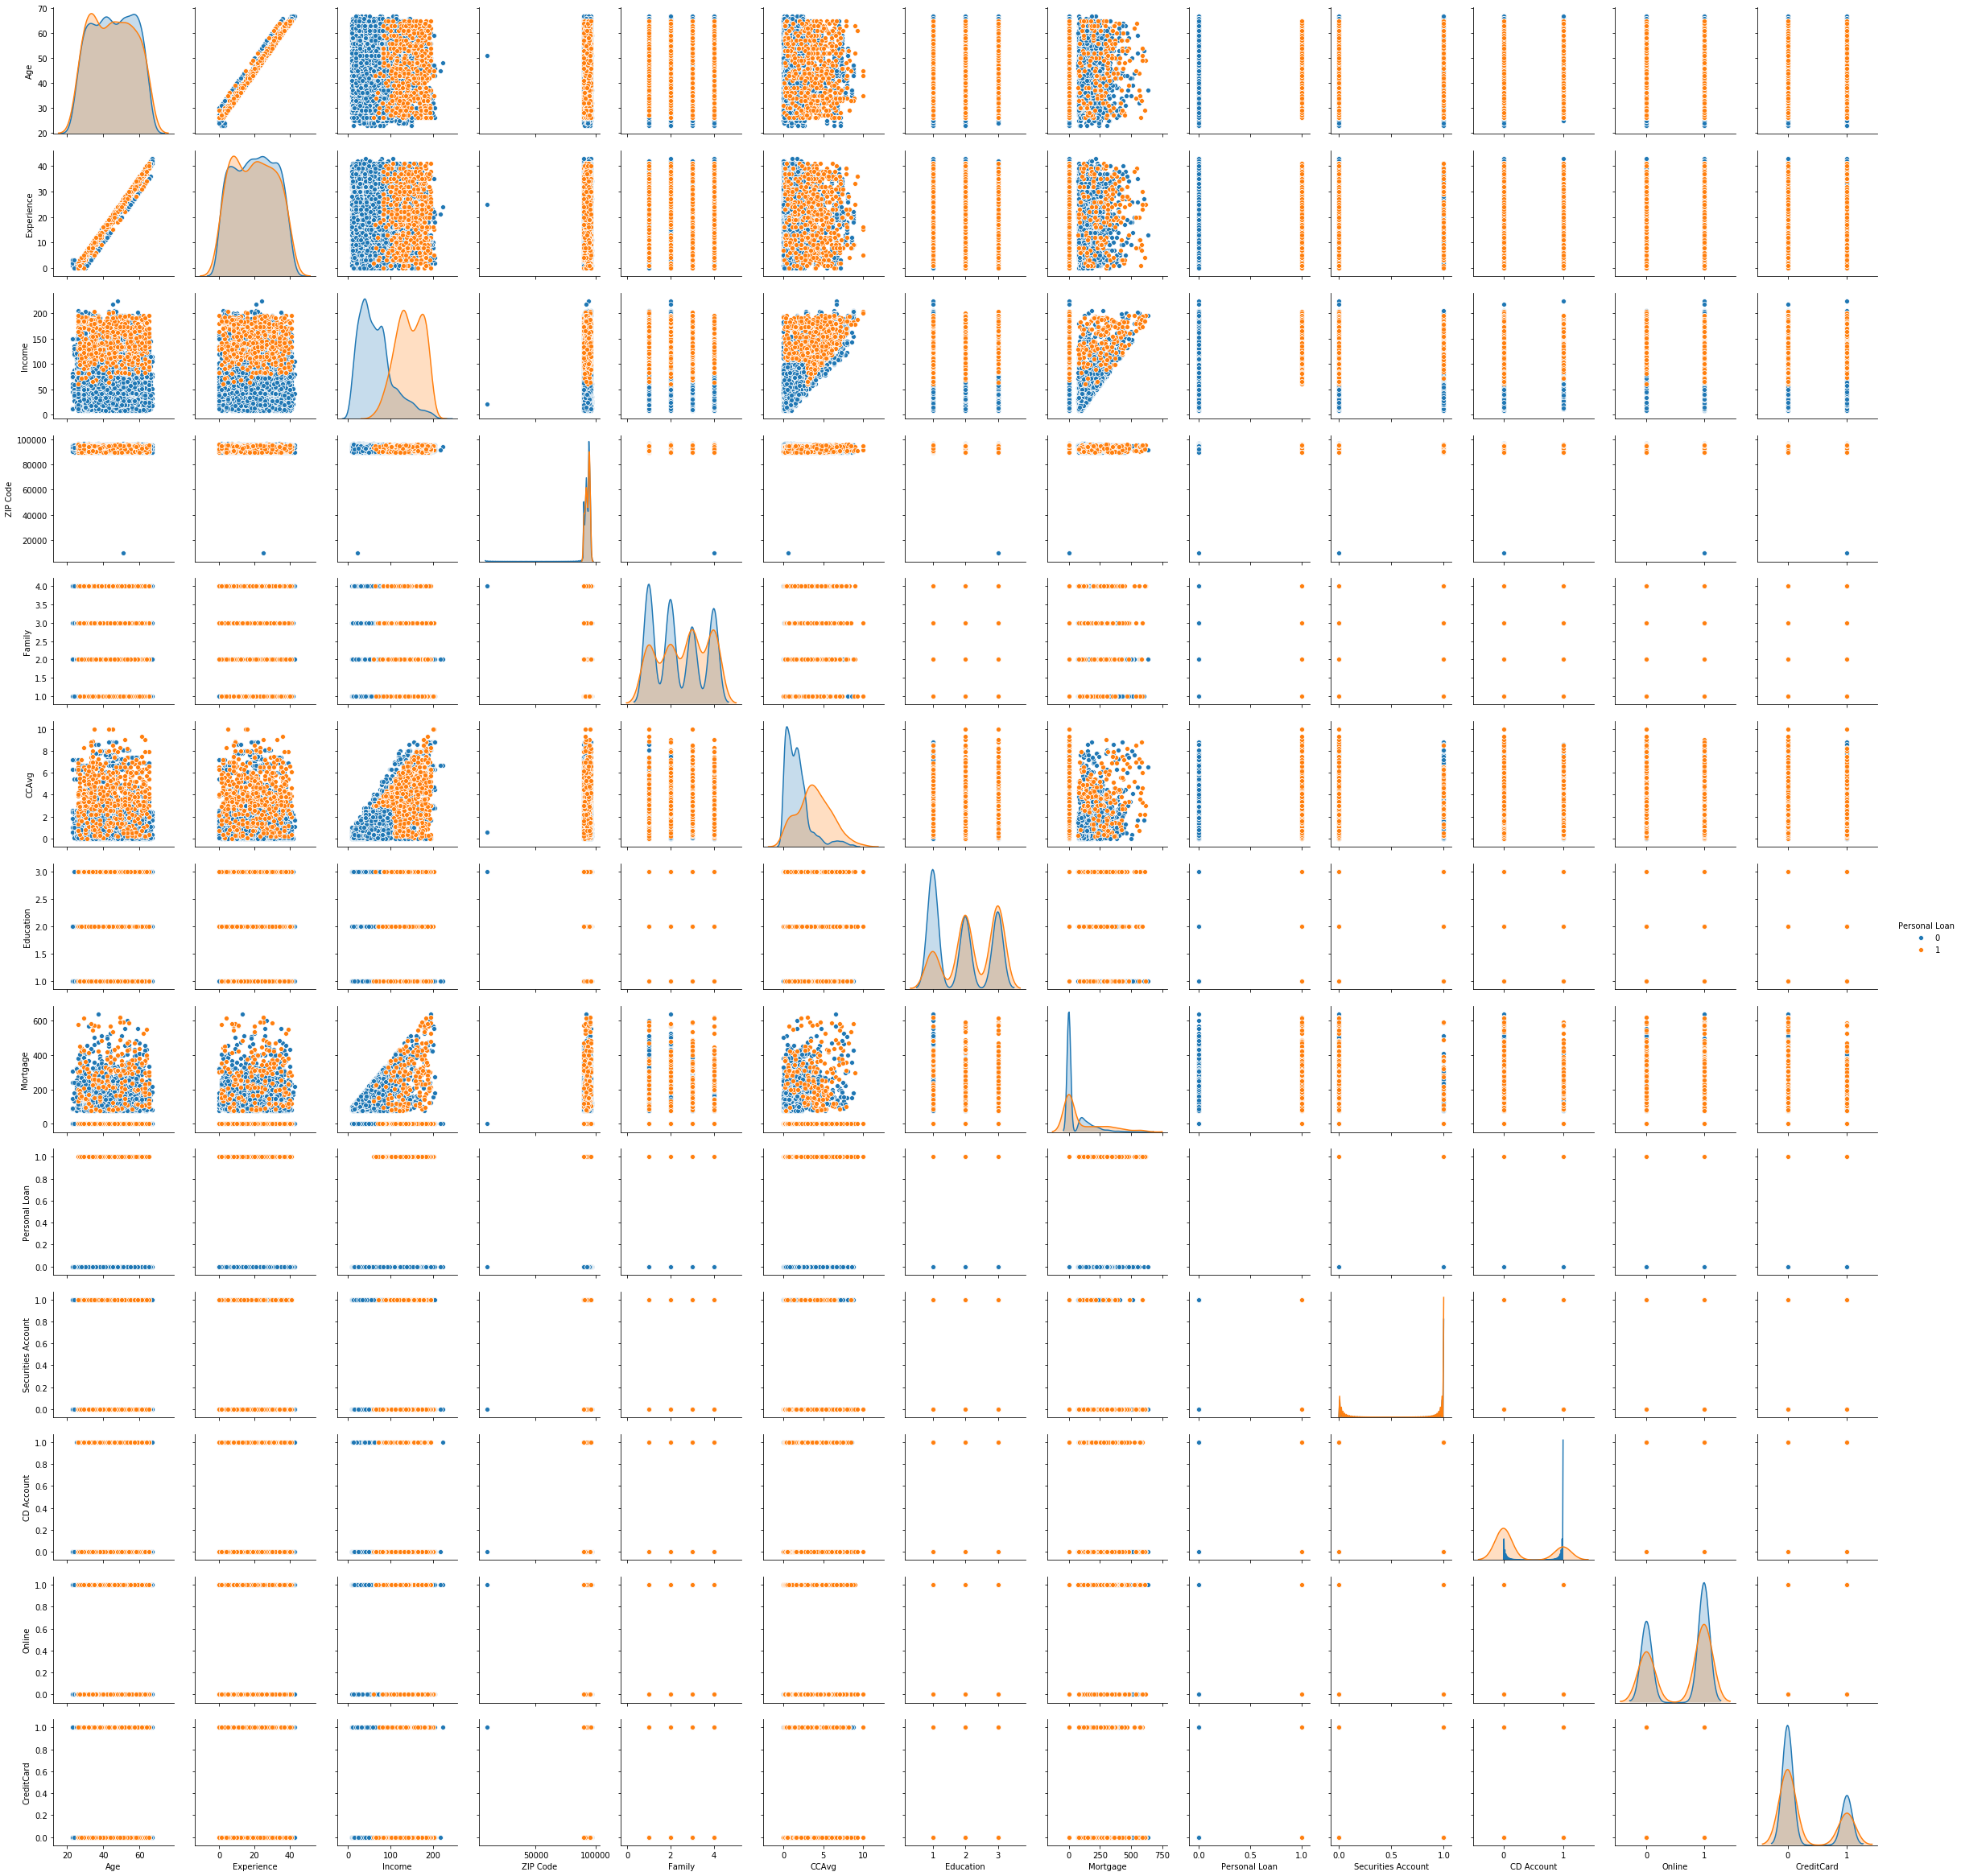

In [43]:
sns.pairplot(df2,hue='Personal Loan')

# Analysing the distribution in the diagonal, we see that:
    # Age and Experience have highly overlapping distributions indicating that they are poor predictors. Moreover, age and experience are highly correlated.
    # The distribution of Zipcode (although it is a nominal categorical variable), has a highly overlapping distribution
    # All other features have non-overlapping distributions, indicating that they contribute to some extent in determing the target label

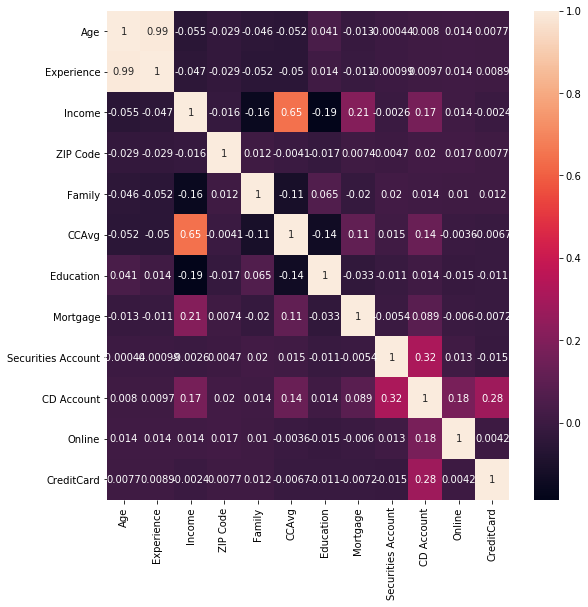

In [21]:
# Checking correlation among features

temp_df=df2.drop('Personal Loan',axis=1)
corr=temp_df.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True)

# There are a couple of pairs of highly correlated features (mentioned in the next line) indicating that there could be redundant features
# As expected, Experience and Age are strongly correlated 
# CC Average and Income too have a relatively high correlation 

In [22]:
# Separating the feature set and the response variables
# Dropped Age, Experience, and Zipcode as they are poor predictors. This has been done after extensive trial and error.
# As per the column description file shared, Family and Education are ordinal variables and hence do not require one hot encoding

X=df2[['Income', 'Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 'Online', 'CreditCard']]
y=df2[['Personal Loan']]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=7)

### Logistic Regression

In [24]:
# Fitting the logistic regression model 

model_logistic_regression=LogisticRegression()
model_logistic_regression.fit(X_train,y_train)
predictions_xtest=model_logistic_regression.predict(X_test)

In [25]:
# Lisitng the logistic regression coefficients and intercept.

t=list(X_train.columns)
coef_df=pd.DataFrame(model_logistic_regression.coef_,columns=t)
coef_df['intercept']=model_logistic_regression.intercept_
print(coef_df)

     Income    Family     CCAvg  Education  Mortgage  Securities Account  \
0  0.039795  0.511982  0.128288   1.183702  0.000482           -0.634096   

   CD Account    Online  CreditCard  intercept  
0    3.007062 -0.579237   -0.987462  -9.926426  


In [26]:
metrics.confusion_matrix(y_test,predictions_xtest)

array([[1351,   11],
       [  54,   84]], dtype=int64)

In [27]:
print("Accuracy score: ",model_logistic_regression.score(X_test,y_test))
precision_recall_f1score=metrics.precision_recall_fscore_support(y_test,predictions_xtest)
print("Precision: ",precision_recall_f1score[0][1])
print("Recall: ",precision_recall_f1score[1][1])
print("F1 score: ",precision_recall_f1score[2][1])

# The logistic regression gives a high accuracy score of >95%, however, the F1 score is ~72%. 
# We can try this model with different thresholds and check if there's a difference

Accuracy score:  0.9566666666666667
Precision:  0.8842105263157894
Recall:  0.6086956521739131
F1 score:  0.721030042918455


In [28]:
# Checking the model's F1 scores for different threshold values

lr_scores = []
thresh = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in thresh:
    preds = (model_logistic_regression.predict_proba(X_test)[:,1] >=i).astype(int)
    f1_scores = metrics.f1_score(y_test, preds)
    lr_scores.append(f1_scores)

df_optimal = pd.DataFrame(data={'thresh':thresh,'F1_scores':lr_scores})
print(df_optimal)

# It's seen that threshold value of 0.5 is appropriate

   thresh  F1_scores
0     0.1   0.572062
1     0.2   0.678466
2     0.3   0.723404
3     0.4   0.723735
4     0.5   0.721030
5     0.6   0.657407
6     0.7   0.613861
7     0.8   0.524064
8     0.9   0.357143


## The F1 score of the logistic regression model is 72%

### KNN Classifier

In [29]:
# Feature scaling for KNN

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=df2[['Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']].columns)
X_scaled.head()

,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.189815,1.000000,0.16,0.0,0.0,1.0,0.0,0.0,0.0
1,0.120370,0.666667,0.15,0.0,0.0,1.0,0.0,0.0,0.0
2,0.013889,0.000000,0.10,0.0,0.0,0.0,0.0,0.0,0.0
3,0.425926,0.000000,0.27,0.5,0.0,0.0,0.0,0.0,0.0
4,0.171296,1.000000,0.10,0.5,0.0,0.0,0.0,0.0,1.0


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=7)

In [31]:
# Fitting the KNN model with an arbitrary k = 5

model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train,y_train)
predictions_xtest=model_knn.predict(X_test)

In [32]:
metrics.confusion_matrix(y_test,predictions_xtest)

array([[1358,    4],
       [  43,   95]], dtype=int64)

In [33]:
# Finding the optimal value of k

k_values=[var for var in range(1,int(round(np.sqrt(len(X_train))))) if var % 2 != 0]

In [34]:
appended_data=[]
def optimal_k(i):
    model_optimal = KNeighborsClassifier(n_neighbors=i)
    model_optimal.fit(X_train,y_train)
    predicted_labels=model_optimal.predict(X_test)
    print("Score for k={} {}".format(i,metrics.f1_score(y_test,predicted_labels)))
    return metrics.f1_score(y_test,predicted_labels)
for i in k_values:
    appended_data.append(optimal_k(i))

# It's observed that k=3 is the optimal value of k.

Score for k=1 0.8549618320610687
Score for k=3 0.858267716535433
Score for k=5 0.8016877637130801
Score for k=7 0.7811158798283262
Score for k=9 0.7445887445887445
Score for k=11 0.7117117117117117
Score for k=13 0.6936936936936937
Score for k=15 0.6968325791855203
Score for k=17 0.6788990825688074
Score for k=19 0.6790697674418605
Score for k=21 0.6635514018691588
Score for k=23 0.6635514018691588
Score for k=25 0.6220095693779905
Score for k=27 0.5771144278606966
Score for k=29 0.5482233502538071
Score for k=31 0.5333333333333332
Score for k=33 0.5333333333333332
Score for k=35 0.5077720207253886
Score for k=37 0.4842105263157894
Score for k=39 0.45989304812834225
Score for k=41 0.4516129032258065
Score for k=43 0.4432432432432432
Score for k=45 0.42857142857142855
Score for k=47 0.43956043956043955
Score for k=49 0.430939226519337
Score for k=51 0.41340782122905034
Score for k=53 0.40449438202247195
Score for k=55 0.40449438202247195
Score for k=57 0.38857142857142857


In [35]:
# Fitting the KNN model with k=3

model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)
predictions_xtest=model_knn.predict(X_test)

In [36]:
metrics.confusion_matrix(y_test,predictions_xtest)

array([[1355,    7],
       [  29,  109]], dtype=int64)

In [37]:
print("Accuracy score: ",model_knn.score(X_test,y_test))
precision_recall_f1score=metrics.precision_recall_fscore_support(y_test,predictions_xtest)
print("Precision: ",precision_recall_f1score[0][1])
print("Recall: ",precision_recall_f1score[1][1])
print("F1 score: ",precision_recall_f1score[2][1])

Accuracy score:  0.976
Precision:  0.9396551724137931
Recall:  0.7898550724637681
F1 score:  0.858267716535433


## The F1 score of the KNN model is 86% at k=3

### Naive Bayes

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=7)

In [39]:
model_NB=GaussianNB()
model_NB.fit(X_train,y_train)
predictions_xtest=model_NB.predict(X_test)

In [40]:
metrics.confusion_matrix(y_test,predictions_xtest)

array([[1237,  125],
       [  56,   82]], dtype=int64)

In [41]:
print("Accuracy score: ",model_NB.score(X_test,y_test))
precision_recall_f1score=metrics.precision_recall_fscore_support(y_test,predictions_xtest)
print("Precision: ",precision_recall_f1score[0][1])
print("Recall: ",precision_recall_f1score[1][1])
print("F1 score: ",precision_recall_f1score[2][1])

Accuracy score:  0.8793333333333333
Precision:  0.3961352657004831
Recall:  0.5942028985507246
F1 score:  0.47536231884057967


## The F1 score of the Naive Bayes model is ~48%

### Overall, for the given dataset, the KNN model fits best, giving a F1-score of 85% at k=3. The reason behind this model fitting best could be the large training set (3500 observations) relative to the few features (9 used features). This difference helps overcome the curse of dimensionality. However, the model needs to be tested on a validation set to make sure that the small k-value (k = 3) used in the model has not resulted in overfitting. 

### The Logistic regression model has a reasonable F1-score of 72% and the the Naive Bayes model is the worst performing among the 3, with a F1-score of ~48%. The reason behind the poor performance of these model could be the collinearity of features in the dataset. For example: Income and CCAvg are highly correlated. This breaks one of the basic assumptions of the Logistic regression Naive Bayes models - Non-collinearity of features